In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from scipy.spatial.distance import pdist, squareform

In [5]:
df = pd.read_csv("Automobile_data.csv")
print(df.head(100))

    symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   
..        ...               ...          ...       ...        ...   
95          1               128       nissan       gas        std   
96          1               122       nissan       gas        std   
97          1               103       nissan       gas        std   
98          2               168       nissan       gas        std   
99          0               106       nissan       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front        88.6  ...   
1           two



Очистити дані та обробити відсутні дані.

In [6]:
df.duplicated().sum()
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64



Матриця відстаней між рядками для заповнення відсутніх даних

In [7]:
def jaccard(u, v):
    u, v = set(u), set(v)
    return 1 - len(u.intersection(v)) / len(u.union(v))


distance_matrix = pd.DataFrame(squareform(pdist(df, metric=lambda u, v: jaccard(u, v))))
distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,0.000000,0.074074,0.700000,0.891304,0.893617,0.869565,0.893617,0.869565,0.916667,0.891304,...,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.891304,0.869565,0.916667,0.891304
1,0.074074,0.000000,0.666667,0.891304,0.893617,0.869565,0.893617,0.869565,0.916667,0.891304,...,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.891304,0.869565,0.916667,0.891304
2,0.700000,0.666667,0.000000,0.914894,0.916667,0.844444,0.869565,0.844444,0.916667,0.866667,...,0.891304,0.891304,0.891304,0.914894,0.914894,0.891304,0.891304,0.844444,0.916667,0.891304
3,0.891304,0.891304,0.914894,0.000000,0.583333,0.657895,0.692308,0.725000,0.756098,0.837209,...,0.863636,0.809524,0.837209,0.863636,0.888889,0.837209,0.863636,0.840909,0.891304,0.863636
4,0.893617,0.893617,0.916667,0.583333,0.000000,0.666667,0.666667,0.700000,0.761905,0.756098,...,0.866667,0.840909,0.866667,0.840909,0.866667,0.840909,0.866667,0.818182,0.893617,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.866667,0.866667,0.891304,0.837209,0.840909,0.866667,0.840909,0.866667,0.866667,0.913043,...,0.437500,0.484848,0.484848,0.750000,0.750000,0.000000,0.529412,0.583333,0.657895,0.333333
201,0.891304,0.891304,0.891304,0.863636,0.866667,0.840909,0.813953,0.840909,0.840909,0.863636,...,0.684211,0.684211,0.684211,0.717949,0.717949,0.529412,0.000000,0.692308,0.692308,0.387097
202,0.869565,0.869565,0.844444,0.840909,0.818182,0.869565,0.844444,0.869565,0.869565,0.914894,...,0.756098,0.785714,0.785714,0.813953,0.813953,0.583333,0.692308,0.000000,0.666667,0.657895
203,0.916667,0.916667,0.916667,0.891304,0.893617,0.916667,0.893617,0.916667,0.869565,0.914894,...,0.813953,0.840909,0.840909,0.813953,0.813953,0.657895,0.692308,0.666667,0.000000,0.657895


In [8]:
np_df = df.to_numpy()
for column in df.columns:
    column_index = df.columns.get_loc(column)
    mask = df[column] == "?"
    indexes = df.index[mask].tolist()
    print("Колонка :",column," рядки з відсутніми даними", indexes)
    for i in indexes:
        newvalue = ""
        min_val = 1
        for j in range(df.shape[0]):
            if i == j:
                continue
            if distance_matrix[i][column_index] >= min_val:
                continue
            value = np_df[j][column_index]
            if value == "?":
                continue
            min_val = distance_matrix[i][column_index]
            newvalue = value
        np_df[i][column_index] = newvalue
clear_df = pd.DataFrame(np_df, columns=df.columns)
type_change_columns = ['normalized-losses', 'bore', 'stroke', 'peak-rpm',
                       'horsepower', 'price', 'highway-mpg', 'city-mpg', 'peak-rpm',
                       'compression-ratio', 'engine-size', 'height', 'width', 'length', 'wheel-base', 'curb-weight']
for column in type_change_columns:
    clear_df[column] = clear_df[column].astype(np.float64)
clear_df.head()

Колонка : symboling  рядки з відсутніми даними []
Колонка : normalized-losses  рядки з відсутніми даними [0, 1, 2, 5, 7, 9, 14, 15, 16, 17, 43, 44, 45, 46, 48, 49, 63, 66, 71, 73, 74, 75, 82, 83, 84, 109, 110, 113, 114, 124, 126, 127, 128, 129, 130, 131, 181, 189, 191, 192, 193]
Колонка : make  рядки з відсутніми даними []
Колонка : fuel-type  рядки з відсутніми даними []
Колонка : aspiration  рядки з відсутніми даними []
Колонка : num-of-doors  рядки з відсутніми даними [27, 63]
Колонка : body-style  рядки з відсутніми даними []
Колонка : drive-wheels  рядки з відсутніми даними []
Колонка : engine-location  рядки з відсутніми даними []
Колонка : wheel-base  рядки з відсутніми даними []
Колонка : length  рядки з відсутніми даними []
Колонка : width  рядки з відсутніми даними []
Колонка : height  рядки з відсутніми даними []
Колонка : curb-weight  рядки з відсутніми даними []
Колонка : engine-type  рядки з відсутніми даними []
Колонка : num-of-cylinders  рядки з відсутніми даними []
Кол

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,164.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


#### EDA
### pair plots :

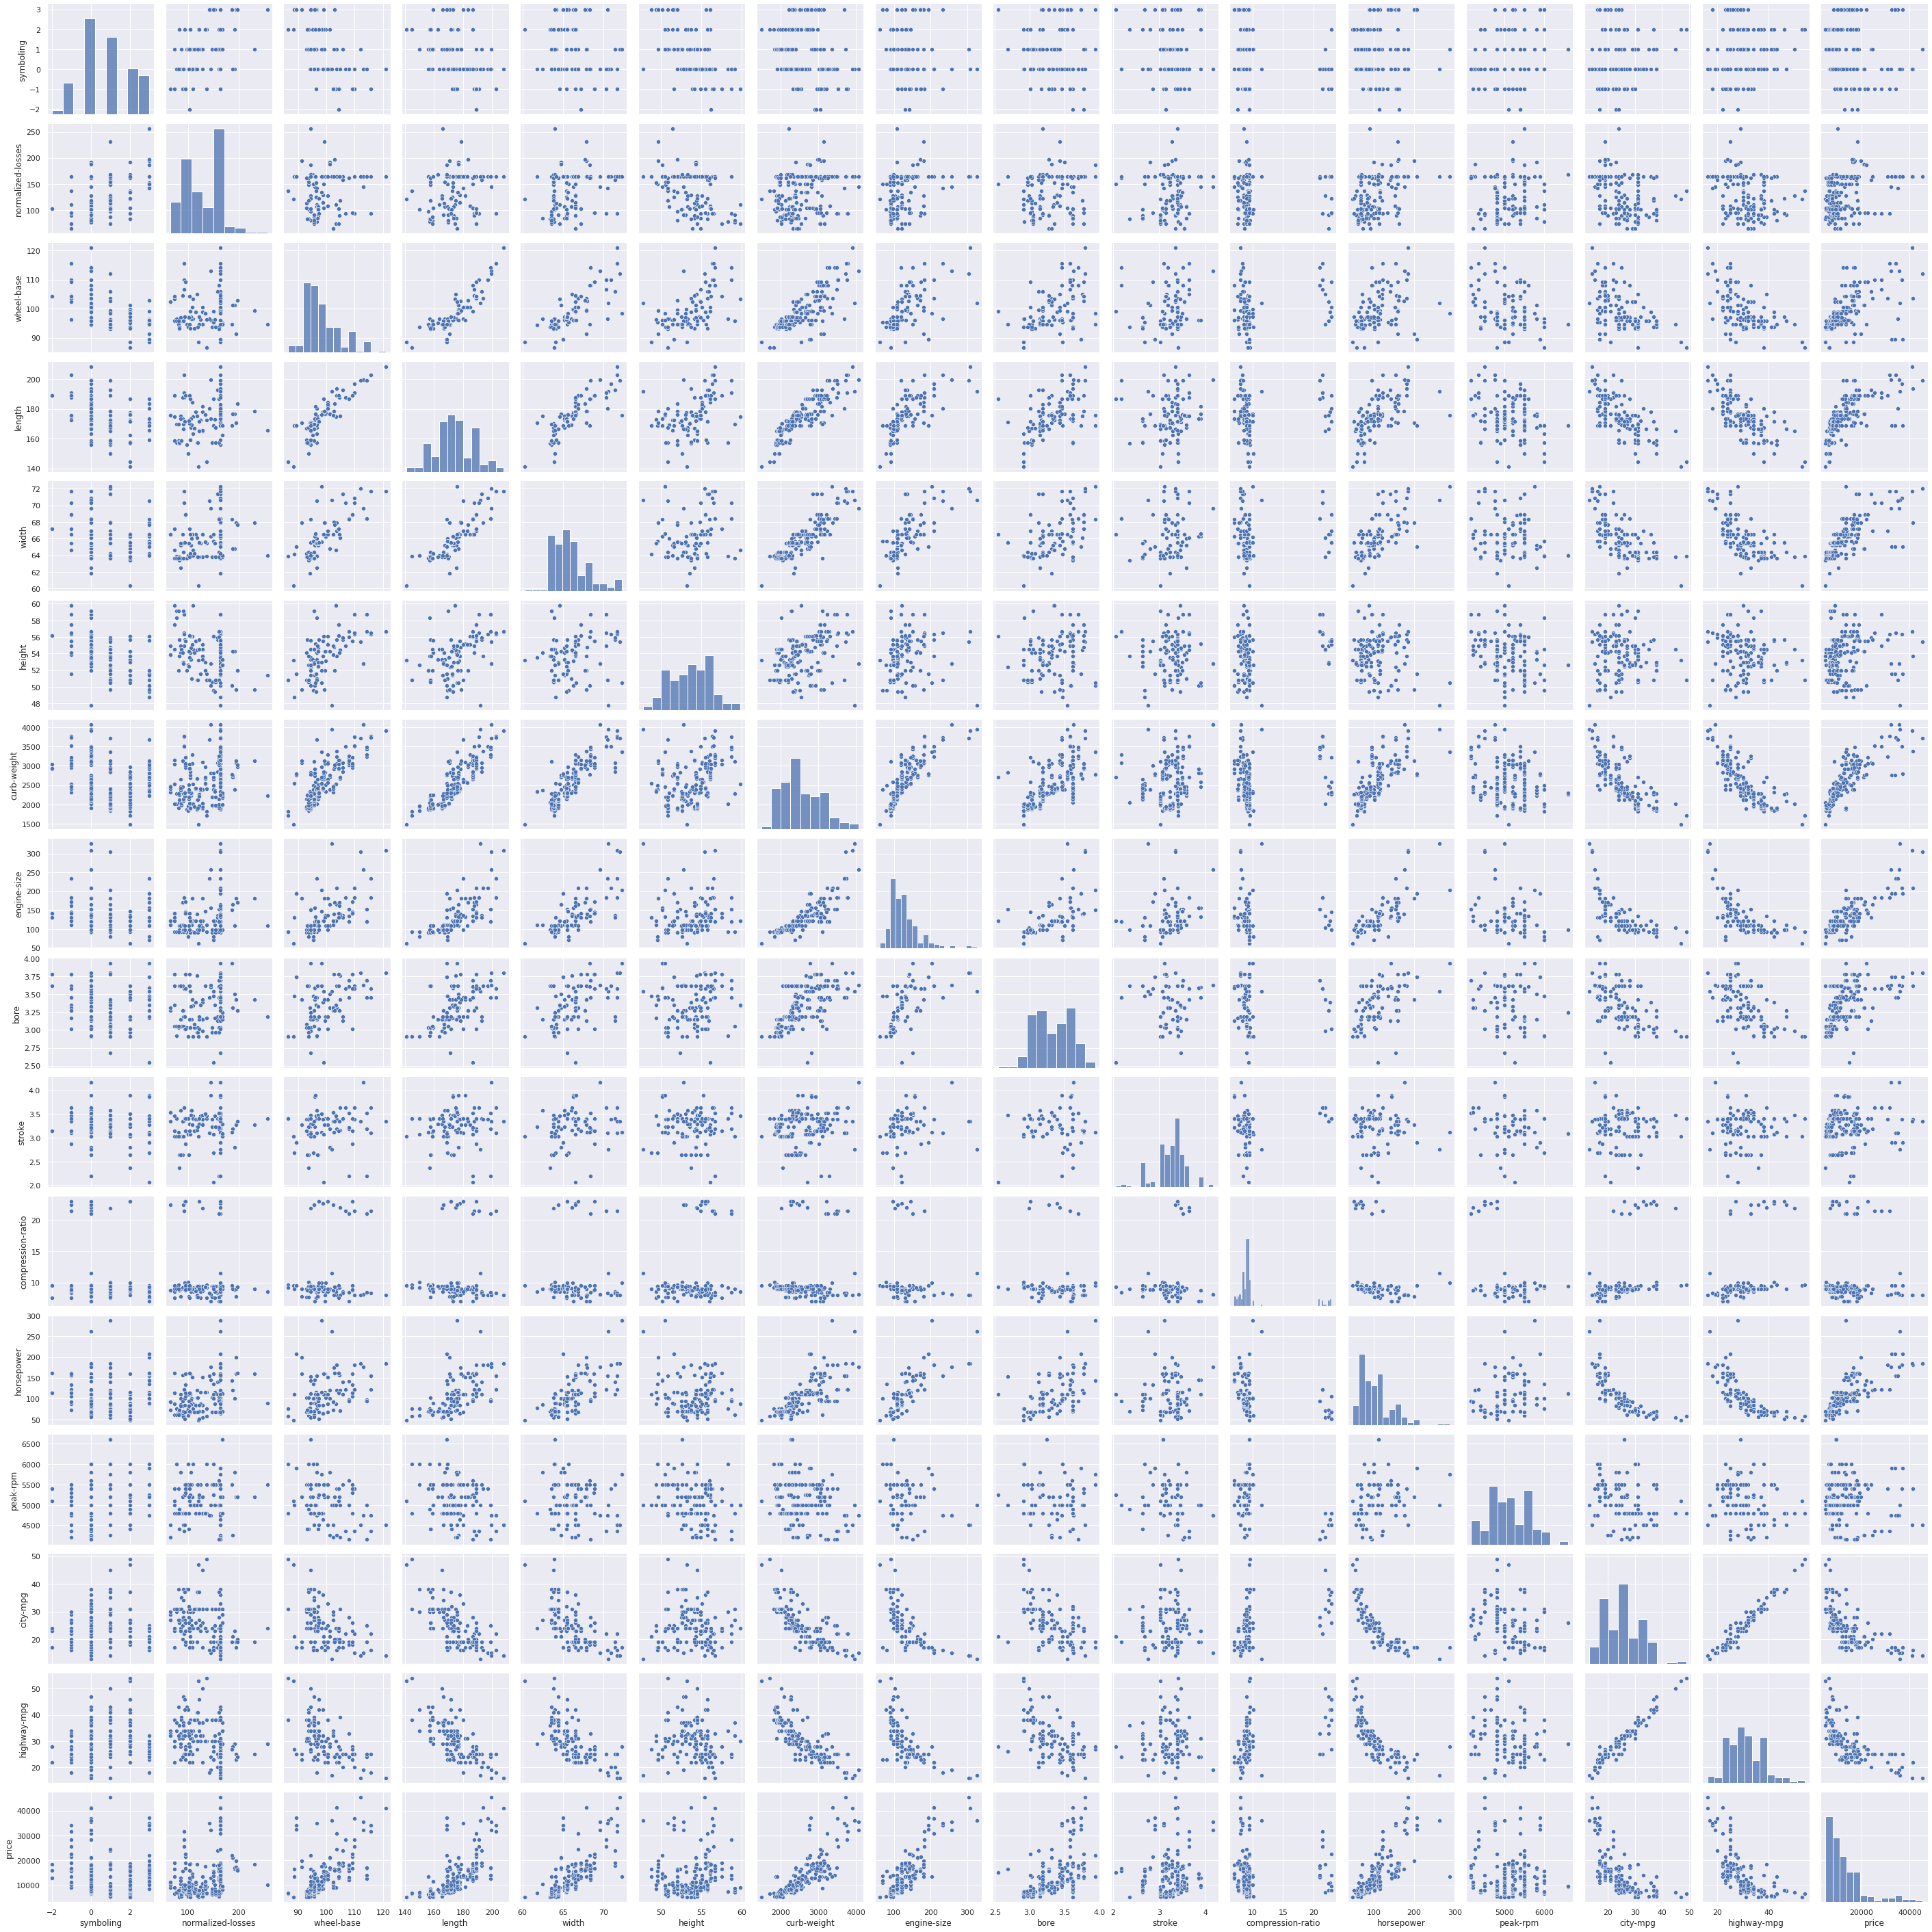

In [9]:
sns.pairplot(clear_df)

#### EDA
### boxplots for non-numerical values to "price"

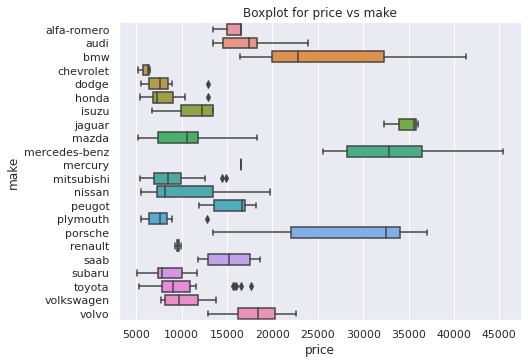

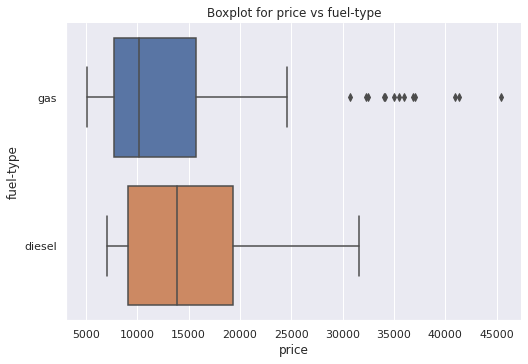

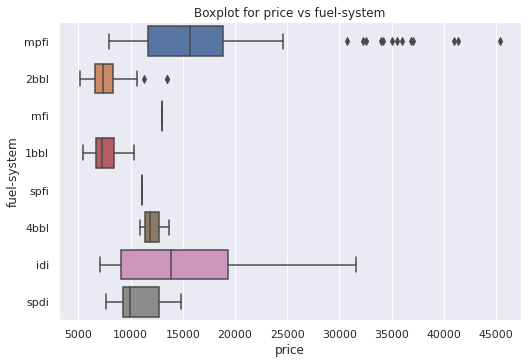

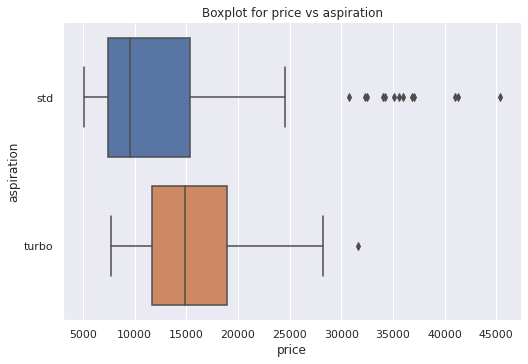

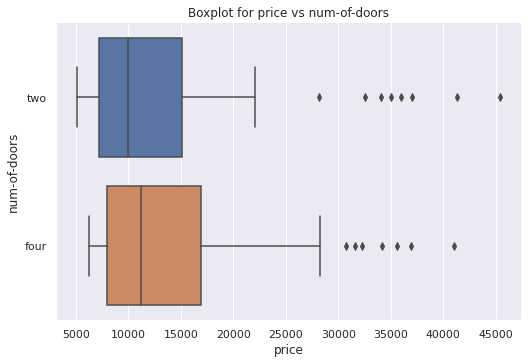

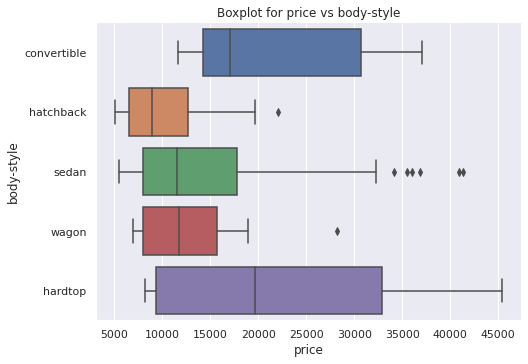

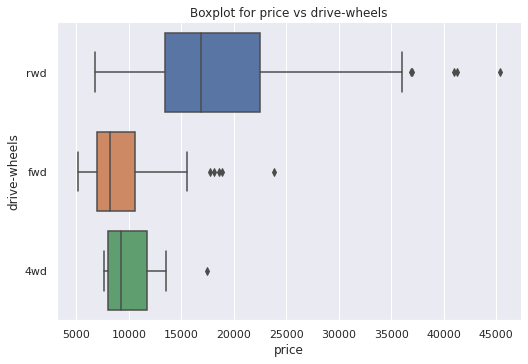

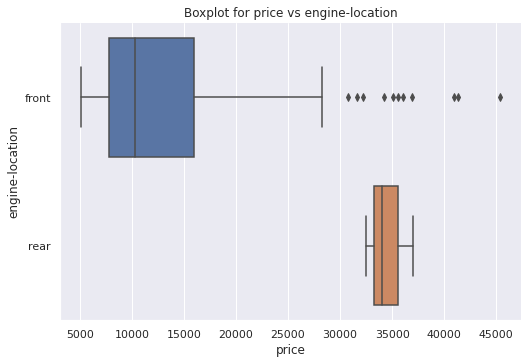

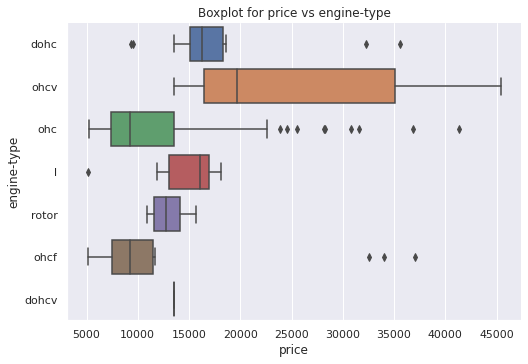

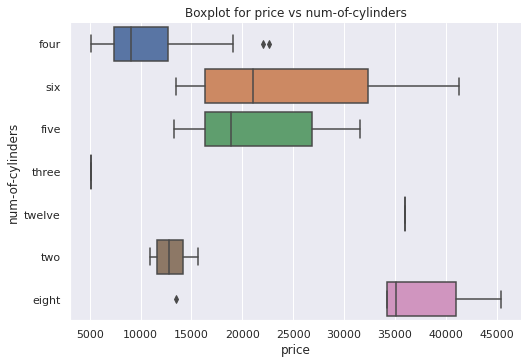

In [10]:
import matplotlib.pyplot as plt

non_numeric_columns = ["make", "fuel-type", "fuel-system", "aspiration", "num-of-doors", "body-style", "drive-wheels",
                       "engine-location", "engine-type", "num-of-cylinders"]
for column in non_numeric_columns:
    sns.catplot(x="price", y=column, data=clear_df, kind="box", aspect=1.5)
    plt.title(f"Boxplot for price vs {column}")
    plt.show()

#### EDA
### Correlation heatmap

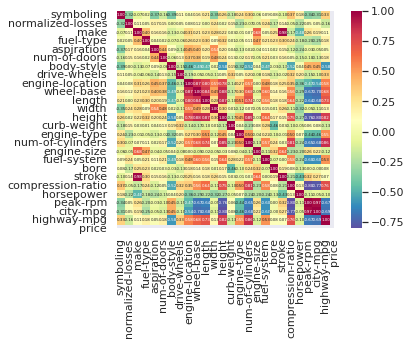

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164.0,0,0,0,0,0,0,0,88.6,...,130.0,0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,164.0,0,0,0,0,0,0,0,88.6,...,130.0,0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,164.0,0,0,0,0,1,0,0,94.5,...,152.0,0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,1,0,0,1,2,1,0,99.8,...,109.0,0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,1,0,0,1,2,2,0,99.4,...,136.0,0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,0,0,1,2,0,0,109.1,...,141.0,0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1,95.0,21,0,1,1,2,0,0,109.1,...,141.0,0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1,95.0,21,0,0,1,2,0,0,109.1,...,173.0,0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1,95.0,21,1,1,1,2,0,0,109.1,...,145.0,6,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [13]:

for column in non_numeric_columns:
    clear_df[column] = clear_df[column].factorize()[0]
corrmat = clear_df.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 4},
                 yticklabels=clear_df.columns,
                 xticklabels=clear_df.columns,
                 cmap="Spectral_r")
plt.show()
clear_df

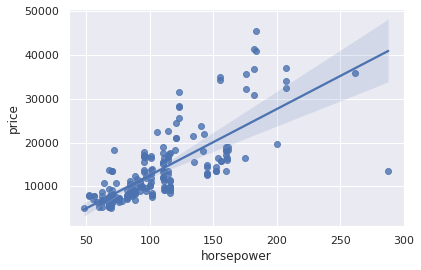

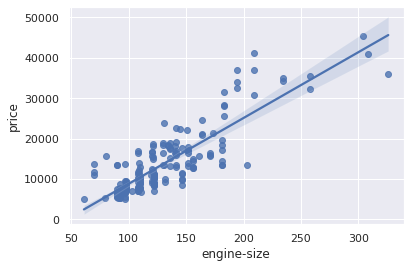

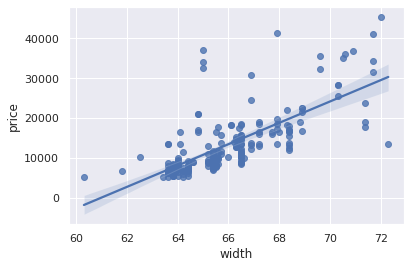

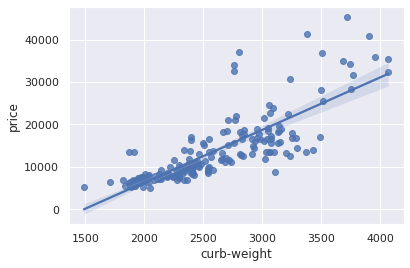

In [14]:
most_correlated_to_price_by_heatmap = ['horsepower', "engine-size", "width", "curb-weight"]
for mctpbh in most_correlated_to_price_by_heatmap:
    sns.regplot(x=mctpbh, y="price", data=clear_df)
    plt.show()

In [15]:
normalized_df_mean = (clear_df - clear_df.mean()) / clear_df.std().apply(pd.to_numeric)
normalized_df_min_max = (clear_df - clear_df.min()) / (clear_df.max() - clear_df.min()).apply(pd.to_numeric)

#### Feature selection
### Variance threshold

In [16]:

from sklearn.feature_selection import VarianceThreshold

train_set = normalized_df_min_max.drop('price', axis=1)
thresholds = [0.01, 0.03, 0.05, 0.1]
for threshold in thresholds:
    selector = VarianceThreshold(threshold)
    selector.fit(train_set)
    selector.transform(train_set)
    print(
        f"Feature list with variance threshold - {threshold}, num of features - {len(selector.get_feature_names_out())}")
    print(selector.get_feature_names_out())

Feature list with variance threshold - 0.01, num of features - 25
['symboling' 'normalized-losses' 'make' 'fuel-type' 'aspiration'
 'num-of-doors' 'body-style' 'drive-wheels' 'engine-location' 'wheel-base'
 'length' 'width' 'height' 'curb-weight' 'engine-type' 'num-of-cylinders'
 'engine-size' 'fuel-system' 'bore' 'stroke' 'compression-ratio'
 'horsepower' 'peak-rpm' 'city-mpg' 'highway-mpg']
Feature list with variance threshold - 0.03, num of features - 21
['symboling' 'normalized-losses' 'make' 'fuel-type' 'aspiration'
 'num-of-doors' 'body-style' 'drive-wheels' 'wheel-base' 'length' 'width'
 'height' 'curb-weight' 'engine-type' 'num-of-cylinders' 'fuel-system'
 'bore' 'compression-ratio' 'peak-rpm' 'city-mpg' 'highway-mpg']
Feature list with variance threshold - 0.05, num of features - 8
['symboling' 'make' 'fuel-type' 'aspiration' 'num-of-doors' 'drive-wheels'
 'fuel-system' 'compression-ratio']
Feature list with variance threshold - 0.1, num of features - 2
['aspiration' 'num-of-d

#### Feature selection
### Pearson Correlation

In [17]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest

train_set = normalized_df_min_max.drop('price', axis=1)
train_y = normalized_df_min_max['price']


def udf_pearsonr(X, y):
    result = np.array([pearsonr(x, y) for x in X.T])
    return np.absolute(result[:, 0]), result[:, 1]


selector = SelectKBest(udf_pearsonr, k=8)
selector.fit(train_set, train_y)
print("Pearson Correlation selected features:")
print(selector.get_feature_names_out())

for idx in range(train_set.shape[1]):
    pea_score, p_value = pearsonr(train_set.values[:, idx], train_y)
    print(
        f"The absolute value of the correlation between the {train_set.columns[idx]} and target is {round(np.abs(pea_score), 2)},p-value is {round(p_value, 3)}")

Pearson Correlation selected features:
['wheel-base' 'length' 'width' 'curb-weight' 'engine-size' 'horsepower'
 'city-mpg' 'highway-mpg']
The absolute value of the correlation between the symboling and target is 0.08,p-value is 0.24
The absolute value of the correlation between the normalized-losses and target is 0.33,p-value is 0.0
The absolute value of the correlation between the make and target is 0.16,p-value is 0.02
The absolute value of the correlation between the fuel-type and target is 0.11,p-value is 0.116
The absolute value of the correlation between the aspiration and target is 0.18,p-value is 0.011
The absolute value of the correlation between the num-of-doors and target is 0.05,p-value is 0.474
The absolute value of the correlation between the body-style and target is 0.18,p-value is 0.01
The absolute value of the correlation between the drive-wheels and target is 0.58,p-value is 0.0
The absolute value of the correlation between the engine-location and target is 0.33,p-val

#### Feature selection
### F-score regression

In [18]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

train_set = normalized_df_min_max.drop('price', axis=1).apply(pd.to_numeric)
train_y = normalized_df_min_max['price'].apply(pd.to_numeric)

selector = SelectKBest(f_regression, k=8)
selector.fit(train_set, train_y)
print("F-score selected features:")
print(selector.get_feature_names_out())

F-score selected features:
['wheel-base' 'length' 'width' 'curb-weight' 'engine-size' 'horsepower'
 'city-mpg' 'highway-mpg']


#### Feature selection
### Random forest model

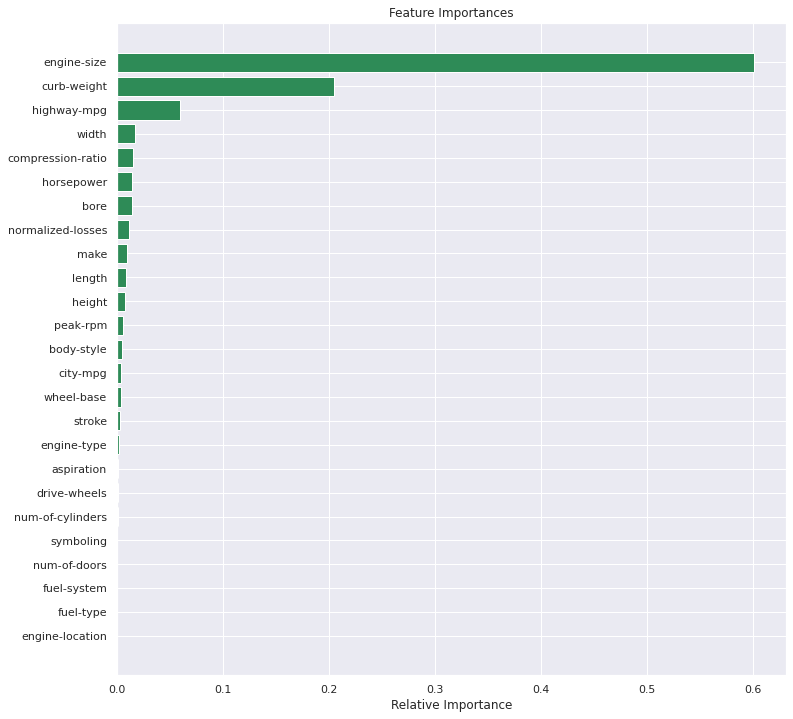

In [19]:
# Random forest model
import numpy as np
from sklearn.ensemble import RandomForestRegressor

train_set = normalized_df_min_max.drop('price', axis=1).apply(pd.to_numeric)
train_y = normalized_df_min_max['price'].apply(pd.to_numeric)
test_set = train_set
clf = RandomForestRegressor(n_estimators=50, random_state=123)
clf.fit(train_set, train_y)
np.round(clf.feature_importances_, 3)
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='seagreen', align='center')
plt.yticks(range(len(indices)), np.array(train_set.columns)[indices])
plt.xlabel('Relative Importance');